In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np
import pandas as pd

In [3]:
dataset_path = '/home/shuowang/data/air_quality/dataset/hb152/air_quality_dataset_aqi_weather_emission_2016_2020.nc'
ds = xr.open_dataset(dataset_path, engine='netcdf4')


/home/shuowang/anaconda3/envs/aqi_gpu/lib/python3.11/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
ecCodes library not found using ['eccodes', 'libeccodes.so', 'libeccodes']
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
ds

<xarray.Dataset> Size: 534MB
Dimensions:        (station: 152, time: 43848)
Coordinates:
  * time           (time) datetime64[ns] 351kB 2016-01-01 ... 2020-12-31T23:0...
  * station        (station) <U5 3kB '1001A' '1002A' '1003A' ... '2865A' '2878A'
Data variables: (12/20)
    NO2            (station, time) float32 27MB ...
    O3             (station, time) float32 27MB ...
    PM10           (station, time) float32 27MB ...
    PM2.5          (station, time) float32 27MB ...
    blh            (station, time) float32 27MB ...
    d2m            (station, time) float32 27MB ...
    ...             ...
    sp             (station, time) float32 27MB ...
    spd100         (station, time) float32 27MB ...
    t2m            (station, time) float32 27MB ...
    tp             (station, time) float32 27MB ...
    u100           (station, time) float32 27MB ...
    v100           (station, time) float32 27MB ...

In [5]:
# 获取可选择的变量和站点
variables = list(ds.data_vars)  # 数据变量，例如 PM2.5, PM10, O3 等
stations = list(ds['station'].values)  # 站点列表

# 创建交互式函数
def plot_timeseries(variable, station):
    """根据选择的变量和站点，绘制时间序列图"""
    plt.figure(figsize=(10, 6))
    data = ds[variable].sel(station=station).values
    time = ds['time'].values
    plt.plot(time, data, label=f'{variable} at {station}', color='b')
    
    plt.title(f'Time Series of {variable} at Station {station}')
    plt.xlabel('Time')
    plt.ylabel(f'{variable} Value')
    plt.grid(True)
    plt.legend()
    plt.show()

# 创建交互式的下拉菜单
variable_dropdown = widgets.Dropdown(
    options=variables,
    description='Variable:',
    value=variables[0]
)

station_dropdown = widgets.Dropdown(
    options=stations,
    description='Station:',
    value=stations[0]
)

# 连接下拉菜单和绘图函数
interact(plot_timeseries, variable=variable_dropdown, station=station_dropdown)

interactive(children=(Dropdown(description='Variable:', options=('NO2', 'O3', 'PM10', 'PM2.5', 'blh', 'd2m', '…

<function __main__.plot_timeseries(variable, station)>

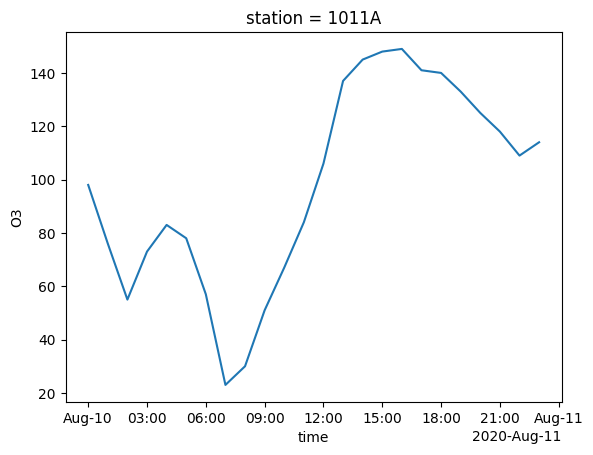

In [6]:
ds['O3'].sel(station='1011A').sel(time='20200810').plot()

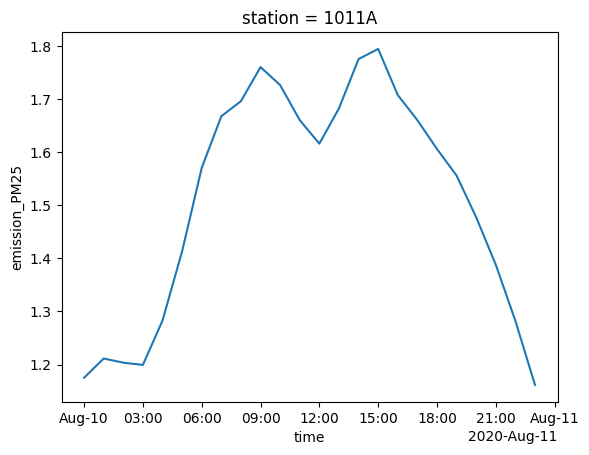

In [7]:
ds['emission_PM25'].sel(station='1011A').sel(time='20200810').plot()

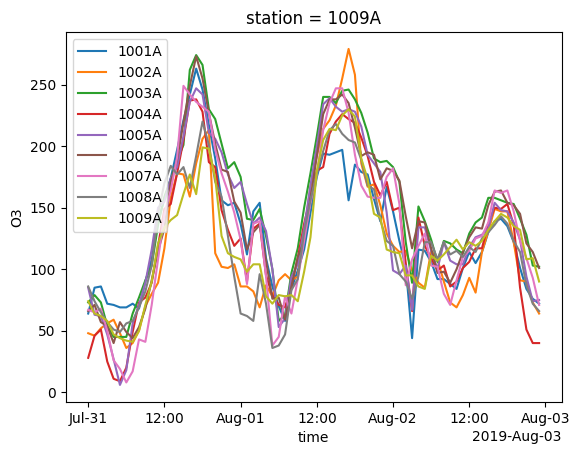

In [8]:
time_slice = slice('20190731', '20190802')
for i in range(1, 10):
    station_name = f'100{i}A'
    ds['O3'].sel(station=station_name).sel(time=time_slice).plot(label=station_name)

plt.legend()  # Automatically includes all labels from the plots
plt.show()

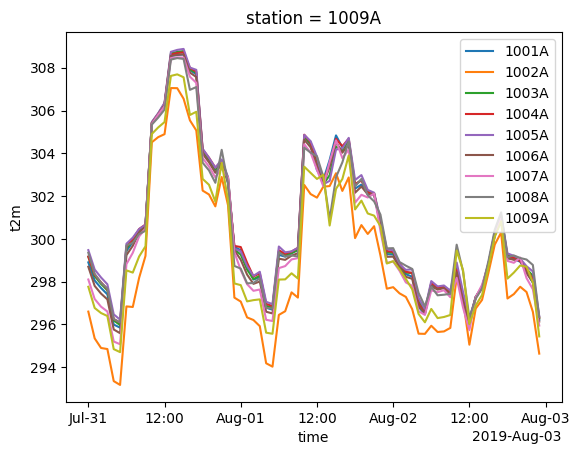

In [9]:
time_slice = slice('20190731', '20190802')
for i in range(1, 10):
    station_name = f'100{i}A'
    ds['t2m'].sel(station=station_name).sel(time=time_slice).plot(label=station_name)

plt.legend()  # Automatically includes all labels from the plots
plt.show()

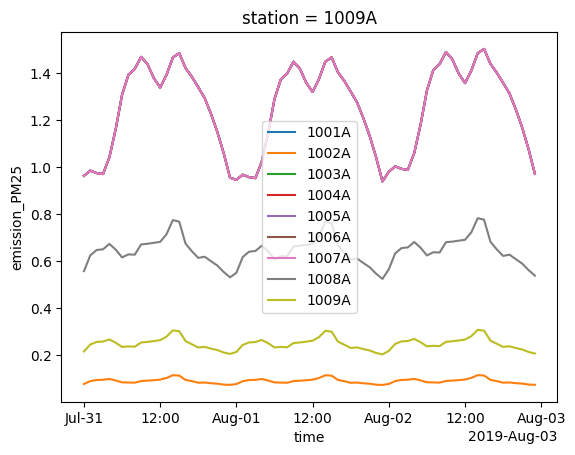

In [10]:
time_slice = slice('20190731', '20190802')
for i in range(1, 10):
    station_name = f'100{i}A'
    ds['emission_PM25'].sel(station=station_name).sel(time=time_slice).plot(label=station_name)

plt.legend()  # Automatically includes all labels from the plots
plt.show()

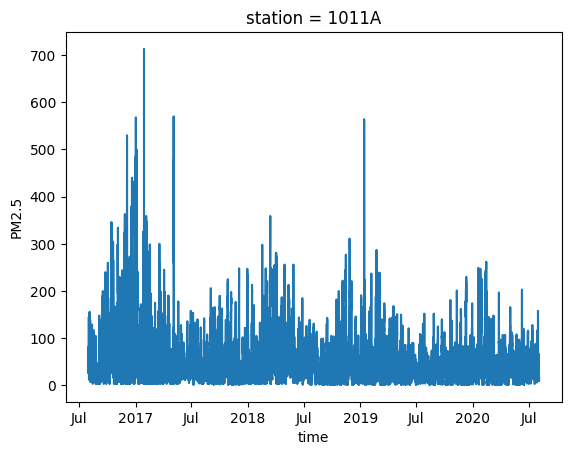

In [11]:
ds['PM2.5'].sel(station='1011A').sel(time=slice('20160731', '20200802')).plot()